# 绘制不沿着经线和纬线的剖面图，例如
![example](https://unidata.github.io/MetPy/latest/_images/sphx_glr_cross_section_001.png)

In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import LongitudeFormatter
import matplotlib.pyplot as plt

## 导入关键库metpy
import metpy.calc as  mpcalc  ##计算天诊物理量的
from metpy.interpolate import cross_section ####关键

In [2]:
# 读取数据
"""
time:2020-4-17 12:00:00
var:[uwind,vwind,div,vor,tempreture,hgt, vertical velovity(垂直速度)]
level: [100,200,300,500,850,925,1000]
"""
ds=xr.open_dataset("D:\\DATA\\adata\\2020-4-17.nc")
ds

<xarray.Dataset>
Dimensions:    (longitude: 241, latitude: 241, level: 27, time: 1)
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 129.5 129.8 130.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... 0.75 0.5 0.25 0.0
  * level      (level) int32 100 125 150 175 200 225 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2020-04-17T12:00:00
Data variables:
    d          (time, level, latitude, longitude) float32 ...
    z          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-17 05:47:25 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

In [3]:
# 利用 metpy 的CF解析 来准备使用的数据
ds = ds.metpy.parse_cf().squeeze()
#定义两个点当作起点和终点，两点确定一条直线
start =(32,118.5)# 南京经纬坐标
end =(22.5,108.5)# 南宁经纬坐标 粗略
# 获取截面数据
cross=cross_section(ds,start,end).set_coords(('latitude','longitude')) # 后面set_coords 是将lat/lon 转换为补充坐标 (里面latitude 对应dataset中的lat变量的名字)
cross

C:\Users\林子扬\AppData\Roaming\Python\Python39\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\林子扬\AppData\Roaming\Python\Python39\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\林子扬\AppData\Roaming\Python\Python39\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\林子扬\AppData\Roaming\Python\Python39\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64

<xarray.Dataset>
Dimensions:    (level: 27, index: 100)
Coordinates:
  * level      (level) int32 100 125 150 175 200 225 ... 900 925 950 975 1000
    time       datetime64[ns] 2020-04-17T12:00:00
    metpy_crs  object Projection: latitude_longitude
    longitude  (index) float64 118.5 118.4 118.3 118.2 ... 108.7 108.6 108.5
    latitude   (index) float64 32.0 31.91 31.82 31.72 ... 22.8 22.7 22.6 22.5
  * index      (index) int32 0 1 2 3 4 5 6 7 8 9 ... 91 92 93 94 95 96 97 98 99
Data variables:
    d          (level, index) float64 -2.646e-05 -2.477e-05 ... 1.617e-05
    z          (level, index) float64 1.61e+05 1.61e+05 ... 936.3 935.5
    t          (level, index) float64 208.8 208.7 208.5 ... 298.0 298.0 297.9
    u          (level, index) float64 20.56 20.37 20.16 ... -1.055 -0.9703
    v          (level, index) float64 -8.102 -7.789 -7.513 ... 1.928 2.232 2.522
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-17 05:47:25 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

In [4]:
# 选取绘图需要的气象要素，本例选取的是位势高度，散度，正常风（u，v合成风），潜在温度（位温:θ）
# 位势高度 hgt
hgt=cross['z']
# 散度 div
div =cross['d']
# 正常风 n_wind 注：t_wind 是切向风
cross['t_wind'],cross['n_wind']=mpcalc.cross_section_components(cross['u'],cross['v'])
# 潜在温度
cross['P_t']=mpcalc.potential_temperature(cross['level'],cross['t'])

In [5]:
cross

Magnitude,[[403.1482220916498 402.84732893584953 402.576225120726 ... 381.16783064038384 381.0350700496397 380.87634993385154] [379.8629039870474 379.6589827154066 379.4571647491898 ... 364.6996338725369 364.4385297575683 364.2147918639478] [363.8963275500761 363.6442464223546 363.39437544978875 ... 354.0638701024488 354.00139909084885 353.9524435999178] ... [294.3633764869066 294.39754528586417 294.38213427043416 ... 299.3912129333814 299.59424536146065 299.8120302386924] [293.93738834869976 293.96338689087094 293.9759891321551 ... 298.7355979614745 298.69960168075914 298.58514514475763] [293.2797546386719 293.28087533233145 293.3014136204265 ... 297.96070672422877 297.96718497706115 297.8693542480469]]
Units,kelvin


In [6]:
plt.rcParams['font.sans-serif'] = ['SimHei']  ###防止无法显示中文并设置黑体
plt.rcParams['axes.unicode_minus'] = False  ###用来正常显示负号

D:\Temp\ipykernel_34292\1699892978.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(1000,99,-100))


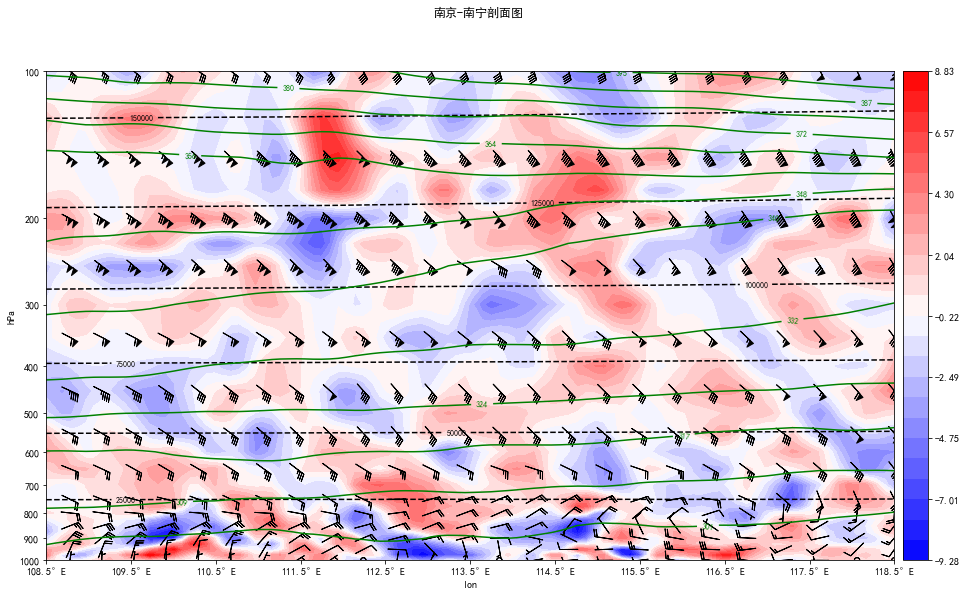

In [7]:
## 绘图部分
fig=plt.figure(figsize=(16,9))
ax=fig.subplots(1,1)

# 位势高度
denghgtlines=ax.contour(cross['longitude'],cross['level'],hgt,colors='k',linestyles='--')
plt.clabel(denghgtlines,inline=True,fontsize=8,fmt='%.0f')
# 散度
colorbar= ax.contourf(cross['longitude'],cross['level'],div*10**5,levels=np.linspace(div.data.min()*10**5,div.data.max()*10**5,25),cmap='bwr')
plt.colorbar(colorbar,extendrect='True',pad=0.01,fraction=0.04, shrink=1)
# 位温
denglines=ax.contour(cross['longitude'],cross['level'],cross['P_t'],levels=np.linspace(cross['P_t'].data.min(),cross['P_t'].data.max(),15),colors='g',linestyles='-')
plt.clabel(denglines,inline=True,fontsize=8,fmt='%.0f')
# 风羽图
ax.barbs(cross['longitude'][::4],cross['level'][::2],cross['t_wind'][::2,::4],cross['n_wind'][::2,::4],pivot='middle',length=6,barb_increments=dict(half=2,full=4,flag=20),color='k')

# 设置y轴以对数显示
ax.invert_yaxis()
ax.set_yscale('symlog')
ax.set_yticklabels(np.arange(1000,99,-100))
ax.set_yticks(np.arange(1000,99,-100))
ax.set_ylim(1000,100)
# # 暴力显示
# ax.set_yticks([1000,925,850,500,300,200,100],['1000','925','850','500','300','200','100'])
ax.set_ylabel('hPa')
# 设置x轴
ax.set_xticks(np.arange(108.5,119,1))
lon_formatter = LongitudeFormatter(zero_direction_label=False)
ax.xaxis.set_major_formatter(lon_formatter)
ax.set_xlabel('lon')

fig.suptitle('南京-南宁剖面图')
fig.savefig('../南京-南宁剖面图.png')

D:\Temp\ipykernel_34292\2887888344.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(1000,50,-100))


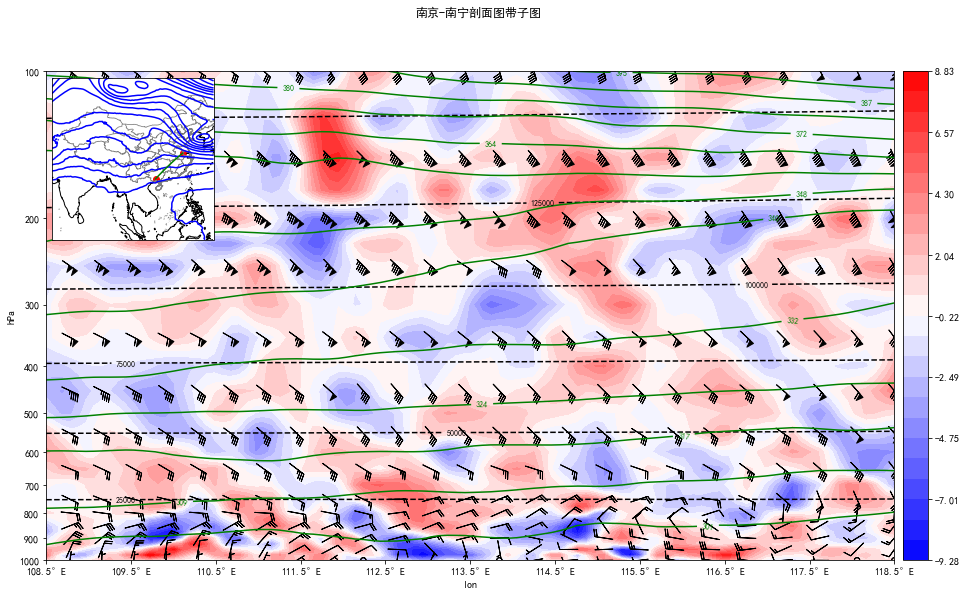

In [8]:
# 可以绘制一个子图来显示是那里到那里的剖面图，就像开头那样的剖面图一样
## 绘图部分
fig=plt.figure(figsize=(16,9))
ax=fig.subplots(1,1)

# 位势高度
denghgtlines=ax.contour(cross['longitude'],cross['level'],hgt,colors='k',linestyles='--')
plt.clabel(denghgtlines,inline=True,fontsize=8,fmt='%.0f')
# 散度
colorbar= ax.contourf(cross['longitude'],cross['level'],div*10**5,levels=np.linspace(div.data.min()*10**5,div.data.max()*10**5,25),cmap='bwr')
plt.colorbar(colorbar,extendrect='True',pad=0.01,fraction=0.04, shrink=1)
# 位温
denglines=ax.contour(cross['longitude'],cross['level'],cross['P_t'],levels=np.linspace(cross['P_t'].data.min(),cross['P_t'].data.max(),15),colors='g',linestyles='-')
plt.clabel(denglines,inline=True,fontsize=8,fmt='%.0f')
# 风羽图
ax.barbs(cross['longitude'][::4],cross['level'][::2],cross['t_wind'][::2,::4],cross['n_wind'][::2,::4],pivot='middle',length=6,barb_increments=dict(half=2,full=4,flag=20),color='k')

# 设置y轴以对数显示
ax.invert_yaxis()
ax.set_yscale('symlog')
ax.set_yticklabels(np.arange(1000,50,-100))
ax.set_yticks(np.arange(1000,50,-100))
ax.set_ylim(1000,100)
# # 暴力显示
# ax.set_yticks([1000,925,850,500,300,200,100],['1000','925','850','500','300','200','100'])
ax.set_ylabel('hPa')
# 设置x轴
ax.set_xticks(np.arange(108.5,119,1))
lon_formatter = LongitudeFormatter(zero_direction_label=False)
ax.xaxis.set_major_formatter(lon_formatter)
ax.set_xlabel('lon')

## 地理子图
proj = ccrs.PlateCarree(central_longitude=113)
ax1=fig.add_axes([-0.05,0.62,0.5,0.25],projection=proj)
ax1.coastlines('50m')
ax1.add_geometries(Reader('D:\\maplist\\China_province\\bou2_4l.shp').geometries(), ccrs.PlateCarree(),
                      facecolor='none', edgecolor='gray', linewidth=0.8)  ###添加省界
ax1.set_extent([70,130,0,60],ccrs.PlateCarree())
# 绘制500hPa等高线图
ax1.contour(ds['longitude'],ds['latitude'],ds['z'].loc[500,:,:],levels=np.arange(ds['z'].data.min(),ds['z'].data.max(),400),colors='b', linestyles='-', transform=ccrs.PlateCarree())

# 绘制南京和南宁的点,及其中间的连线
ax1.scatter(118.5,32,color='r',transform=ccrs.PlateCarree())
ax1.scatter(108.5,22.5,color='r',transform=ccrs.PlateCarree())
ax1.plot(cross['longitude'],cross['latitude'],color='g',transform=ccrs.PlateCarree())

fig.suptitle('南京-南宁剖面图带子图')
fig.savefig('../南京-南宁剖面图子图.png')